In [1]:
# this is the EDA section of capstone 2, diving into the details of the cancer classification data
#to refresh myself, this dataset consists of gene epression values from thousands of genes taken from 
#2 different types of cancer. Initally the data was out of order in columns and consisted of 
#quality values of present, marginal, and absent. I looked at averages of the different qualities and
#filtered out 2 new dataframes, cancer_pass and cancer_marginal. There is not a big differences in marginal
#which consists of both pass and marginal.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
###########input files
cancer_pass=pd.read_csv('cancer_pass.csv')
cancer_marginal=pd.read_csv('cancer_marginal.csv')
cancer_truth=pd.read_csv('actual.csv')
cancer_test=pd.read_csv('data_set_ALL_AML_independent.csv')
cancer_test.shape
result=list(cancer_truth.iloc[:,1])

In [3]:
#reoder columns like we did for train data
test_columns_titles = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

test_order = cancer_test.reindex(columns=test_columns_titles)
test_order.head(2)

,Gene Description,Gene Accession Number,39,40,41,42,43,44,45,46,...,63,64,65,66,67,68,69,70,71,72
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,-62,22,86,-146,-187,-56,...,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-23,-153,-36,-74,-187,-43,...,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126


In [4]:
print(cancer_pass.shape)
print(cancer_marginal.shape)
cancer_pass.head(7)
#first 3 rows are control probes(from annotation)
cancer_pass = cancer_pass.iloc[: , 1:]  #delete first column, leftover bad index
cancer_pass.head(6)

(450, 41)
(478, 41)


,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,AFFX-HUMISGF3A/M97935_3_at (endogenous control),AFFX-HUMISGF3A/M97935_3_at,797,433,1474,415,483,412,383,580,...,202,423,295,532,3995,378,372,722,1378,720
1,AFFX-HUMGAPDH/M33197_3_at (endogenous control),AFFX-HUMGAPDH/M33197_3_at,17782,18112,23006,17633,17384,30481,20356,10642,...,19262,18329,20905,15191,19115,19462,16358,23892,20251,21518
2,AFFX-HSAC07/X00351_3_at (endogenous control),AFFX-HSAC07/X00351_3_at,15774,16959,18285,14245,18323,25364,18106,16885,...,9529,16207,19257,16767,14859,15535,18960,18111,14434,14254
3,mRNA; clone RES4-22A,AB000460_at,1647,2043,1997,2128,1608,1354,1784,2911,...,976,1767,1939,1462,2818,2412,1632,1968,2044,1825
4,Proteasome subunit p44.5,AB003102_at,551,739,885,654,756,769,467,1015,...,467,684,750,600,742,697,372,806,1145,618
5,Proteasome subunit p27,AB003177_at,588,781,1044,652,999,576,764,614,...,635,857,561,296,790,628,637,779,965,598


0      764.405405
1    18671.486486
2    16769.513514
dtype: float64


(array([227.,  66.,  28.,  26.,  21.,  15.,  28.,  15.,  16.,   5.]),
 array([  196.2972973 ,  2698.76756757,  5201.23783784,  7703.70810811,
        10206.17837838, 12708.64864865, 15211.11891892, 17713.58918919,
        20216.05945946, 22718.52972973, 25221.        ]),
 <BarContainer object of 10 artists>)

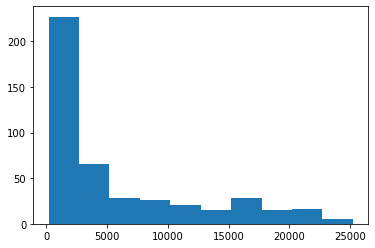

In [5]:
#the data is supposed to be normalized, lets check  each genes mean across the samples
# for control and real data
control=cancer_pass.iloc[0:3,3:]
real_data=cancer_pass.iloc[3:,3:]
print(np.mean(control.T))
plt.hist(np.mean(real_data.T))

(array([ 2.,  8.,  6., 10.,  7.,  1.,  1.,  1.,  0.,  1.]),
 array([4917.4966443 , 5201.87673378, 5486.25682327, 5770.63691275,
        6055.01700224, 6339.39709172, 6623.77718121, 6908.15727069,
        7192.53736018, 7476.91744966, 7761.29753915]),
 <BarContainer object of 10 artists>)

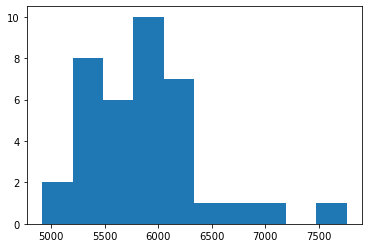

In [6]:
#The first control data has a low mean where as the real data shows a falling distribution with only
# a few genes with very high averages across all samples.
#lets look at means of all the samples
plt.hist(np.mean(real_data))


In [7]:
# the means of the samples does not show a large spread overall
#lets transpose both train and test to have a normal dataframe with features as columns and samples as rows
cancer_passtr=cancer_pass.T
test_tr=test_order.T
cancer_passtr.head(5)

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
Gene Description,AFFX-HUMISGF3A/M97935_3_at (endogenous control),AFFX-HUMGAPDH/M33197_3_at (endogenous control),AFFX-HSAC07/X00351_3_at (endogenous control),mRNA; clone RES4-22A,Proteasome subunit p44.5,Proteasome subunit p27,COX6B gene (COXG) extracted from Human DNA fro...,Dolichol monophosphate mannose synthase (DPM1)...,PROTEASOME COMPONENT C8,GAPD Glyceraldehyde-3-phosphate dehydrogenase,...,GARS Glycyl-tRNA synthetase,GB DEF = Omega light chain protein 14.1 (Ig la...,HLA-A MHC class I protein HLA-A (HLA-A28;-B40;...,Transcription Factor Btf3b,Major Histocompatibility Complex; Class I; E (...,Major Histocompatibility Complex; Class I; E (...,ACTB Actin; beta,GAPD Glyceraldehyde-3-phosphate dehydrogenase,Major Histocompatibility Complex; Class I; C (...,Transcriptional activator hSNF2b
Gene Accession Number,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HSAC07/X00351_3_at,AB000460_at,AB003102_at,AB003177_at,AC002115_cds1_at,AF007875_at,D00762_at,D00763_at,...,U09587_at,M34516_r_at,D32129_f_at,HG1515-HT1515_f_at,HG2915-HT3059_f_at,HG2917-HT3061_f_at,X00351_f_at,X01677_f_at,HG658-HT658_f_at,U29175_at
1,797,17782,15774,1647,551,588,2236,260,645,1324,...,1492,4120,7118,2829,7531,7632,21210,13771,14476,1582
2,433,18112,16959,2043,739,781,5198,362,782,2304,...,1817,3348,14580,4197,8445,7445,21059,15097,13686,624
3,1474,23006,18285,1997,885,1044,4263,400,1119,2677,...,1497,691,5245,3850,3385,3275,24292,17378,6560,753


In [8]:
# need to clean up, first 2 columns are kind of the same. delete first and use the 2nd row
# for columns names
cancer_passtr.columns = cancer_passtr.iloc[1]
cancer_passtr.columns
cancer_passtr = cancer_passtr.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
print(cancer_passtr.shape)

test_tr.columns = test_tr.iloc[1]
test_tr.columns
test_tr = test_tr.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
print(test_tr.shape)

(38, 450)
(34, 7129)


In [9]:
cancer_passtr.head(3)
#rename first column to smaples
cancer_passtr.index.name='sample_id'
#cancer_passtr.index.name
cancer_passtr.head(3)


Gene Accession Number,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HSAC07/X00351_3_at,AB000460_at,AB003102_at,AB003177_at,AC002115_cds1_at,AF007875_at,D00762_at,D00763_at,...,U09587_at,M34516_r_at,D32129_f_at,HG1515-HT1515_f_at,HG2915-HT3059_f_at,HG2917-HT3061_f_at,X00351_f_at,X01677_f_at,HG658-HT658_f_at,U29175_at
sample_id,,,,,,,,,,,,,,,,,,,,,
1,797,17782,15774,1647,551,588,2236,260,645,1324,...,1492,4120,7118,2829,7531,7632,21210,13771,14476,1582
2,433,18112,16959,2043,739,781,5198,362,782,2304,...,1817,3348,14580,4197,8445,7445,21059,15097,13686,624
3,1474,23006,18285,1997,885,1044,4263,400,1119,2677,...,1497,691,5245,3850,3385,3275,24292,17378,6560,753


In [10]:
#need to match the labels to the actual patients in the test and train sets.
cancer_passtr = cancer_passtr.reset_index(drop=True)
y_train = cancer_truth[cancer_truth.patient <= 38].reset_index(drop=True)

# Subset the rest for testing
test_tr = test_tr.reset_index(drop=True)
y_test = cancer_truth[cancer_truth.patient > 38].reset_index(drop=True)
cancer_passtr.describe()

Gene Accession Number,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HSAC07/X00351_3_at,AB000460_at,AB003102_at,AB003177_at,AC002115_cds1_at,AF007875_at,D00762_at,D00763_at,...,U09587_at,M34516_r_at,D32129_f_at,HG1515-HT1515_f_at,HG2915-HT3059_f_at,HG2917-HT3061_f_at,X00351_f_at,X01677_f_at,HG658-HT658_f_at,U29175_at
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,765.263158,18648.078947,16743.315789,1892.710526,687.947368,679.736842,3369.710526,322.078947,653.368421,1575.631579,...,1555.552632,2213.947368,8986.657895,4623.736842,5769.947368,5842.368421,17991.447368,16025.789474,10554.526316,965.263158
std,737.537381,4332.265785,2762.491640,483.499680,259.808656,266.632826,1199.583755,192.930933,298.386872,1131.466196,...,645.691195,2242.261442,4335.307422,1659.604800,3256.194371,3263.896100,5782.493541,3883.585841,3581.291657,754.069489
min,152.000000,5325.000000,9529.000000,976.000000,304.000000,196.000000,1310.000000,108.000000,240.000000,470.000000,...,423.000000,371.000000,1782.000000,2775.000000,438.000000,533.000000,868.000000,2518.000000,2129.000000,208.000000
25%,406.000000,16466.000000,15249.500000,1487.750000,492.500000,528.000000,2616.500000,214.000000,459.000000,814.250000,...,1171.500000,793.000000,5708.000000,3427.250000,3409.000000,3396.000000,15892.750000,13982.000000,8187.250000,406.000000
50%,556.000000,18322.500000,16826.000000,1804.500000,669.000000,631.500000,3219.000000,277.000000,626.000000,1342.500000,...,1448.000000,1108.000000,7829.000000,4389.500000,4939.000000,5088.500000,18551.500000,15606.500000,10609.500000,710.000000
75%,752.750000,20353.500000,18109.750000,2125.250000,802.250000,787.750000,3630.750000,361.750000,762.750000,2033.750000,...,1648.250000,2812.750000,12801.250000,5079.000000,7903.000000,7595.500000,21172.250000,17505.250000,13524.500000,1436.250000
max,3995.000000,30481.000000,25364.000000,3172.000000,1368.000000,1321.000000,7634.000000,1157.000000,1694.000000,6521.000000,...,3559.000000,9380.000000,18066.000000,10401.000000,14675.000000,13750.000000,33638.000000,27972.000000,16593.000000,3707.000000


In [11]:
#need to only have the columns in test set that we have in train set.
train_columns=cancer_passtr.columns
print(train_columns)
x_test=test_tr[train_columns]
x_test.shape
#data is now reduced to only genes that are always pass

Index(['AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMGAPDH/M33197_3_at',
       'AFFX-HSAC07/X00351_3_at', 'AB000460_at', 'AB003102_at', 'AB003177_at',
       'AC002115_cds1_at', 'AF007875_at', 'D00762_at', 'D00763_at',
       ...
       'U09587_at', 'M34516_r_at', 'D32129_f_at', 'HG1515-HT1515_f_at',
       'HG2915-HT3059_f_at', 'HG2917-HT3061_f_at', 'X00351_f_at',
       'X01677_f_at', 'HG658-HT658_f_at', 'U29175_at'],
      dtype='object', name='Gene Accession Number', length=450)


(34, 450)

In [12]:
#lets scale data to all be the same. first change to floats
cancer_passtr.dtypes
x_train_fl=cancer_passtr.astype(float, 64)
x_test_fl=x_test.astype(float,64)
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train_fl))
x_test_sc = pd.DataFrame(scaler.transform(x_test_fl))

In [13]:
#check on scaling
x_train_sc.head(4)
x_train_sc.head(4)

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,0.043608,-0.202597,-0.355595,-0.515013,-0.534184,-0.348675,-0.957773,-0.326087,-0.028422,-0.225380,...,-0.099747,0.861469,-0.436818,-1.095941,0.548091,0.555672,0.564074,-0.588388,1.109687,0.828857
1,-0.456551,-0.125402,0.079124,0.315009,0.199139,0.384883,1.544562,0.209696,0.436877,0.652380,...,0.410346,0.512552,1.307502,-0.260583,0.832555,0.497609,0.537611,-0.242368,0.886135,-0.458637
2,0.973850,1.019425,0.565569,0.218592,0.768634,1.384499,0.754662,0.409302,1.581443,0.986466,...,-0.091899,-0.688319,-0.874652,-0.472476,-0.742266,-0.797155,1.104217,0.352860,-1.130359,-0.285269
3,-0.481284,-0.237452,-0.916510,0.493171,-0.132417,-0.105423,-0.242217,0.204444,0.396121,-0.143873,...,-0.713428,-0.083590,-0.516063,-0.420571,-0.161200,-0.044205,-0.075965,-0.576124,-0.452629,-0.298708


In [14]:
#use pca to try some dimensions reduction. 
pca = PCA()
#pca.fit_transform(x_train_sc)
pca.fit_transform(cancer_passtr)

array([[ 1.08358856e+03, -5.46351673e+03, -2.76803770e+03, ...,
        -1.62167162e+03, -2.70678388e+03,  9.48206258e-12],
       [ 2.14394410e+04, -3.10652573e+03, -8.03967914e+03, ...,
        -9.89663160e+01, -7.99203297e+01,  9.48206258e-12],
       [ 2.20282259e+03,  2.92023515e+04, -2.09721495e+04, ...,
         4.61722423e+02, -3.15095333e+02,  9.48206258e-12],
       ...,
       [ 3.68144602e+03, -2.67735235e+04, -2.47618557e+04, ...,
         1.33750247e+03,  1.06839398e+03,  9.48206258e-12],
       [ 6.16239749e+03, -2.60127185e+04, -5.80574485e+03, ...,
        -7.84659211e+02, -1.20408222e+03,  9.48206258e-12],
       [-2.72161895e+03, -1.18210973e+04,  7.24941777e+03, ...,
         4.95516298e+02,  4.21773287e+02,  9.48206258e-12]])

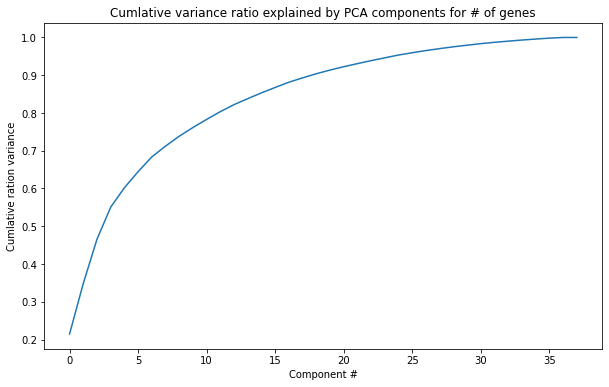

In [15]:
state_pca = PCA().fit(cancer_passtr)
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumlative ration variance')
plt.title('Cumlative variance ratio explained by PCA components for # of genes');

In [16]:
#only a small number of genes are needed to account for most of the variance!
#could start with say 20 genes
# LIST COMPREHENSION HERE
most_important = [np.abs(state_pca.components_[i]).argmax() for i in range(9)]
print(most_important)


[90, 373, 446, 365, 198, 365, 399, 379, 402]


In [17]:
# make number types of cancer
cancer_truth= cancer_truth.replace({'ALL':0,'AML':1})
labels = ['ALL', 'AML']
y_train = cancer_truth[cancer_truth.patient <= 38].reset_index(drop=True)
y_train.head(3)

,patient,cancer
0,1,0
1,2,0
2,3,0


Text(0.5, 1.0, '2D View of group separation ')

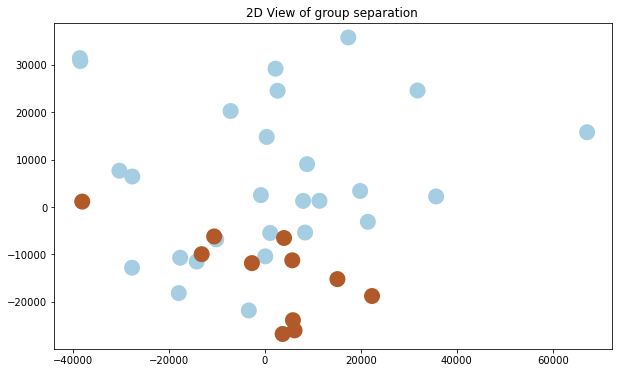

In [18]:
pca3 = PCA(n_components=2).fit(cancer_passtr)
x_train_reduced = pca3.transform(cancer_passtr)
fig = plt.figure(1, figsize = (10, 6))
plt.scatter(x_train_reduced[:, 0],  x_train_reduced[:, 1], c = y_train.iloc[:,1], cmap = plt.cm.Paired, linewidths=10)
plt.title("2D View of group separation ")

In [45]:
#add pairplot
small_df=cancer_passtr.iloc[:,most_important]
small_df.insert(9,"outcome",result[0:38])
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   L06499_at    38 non-null     int64 
 1   D49824_s_at  38 non-null     int64 
 2   X00351_f_at  38 non-null     int64 
 3   D86974_at    38 non-null     int64 
 4   U14970_at    38 non-null     int64 
 5   D86974_at    38 non-null     int64 
 6   M14328_s_at  38 non-null     int64 
 7   X57351_s_at  38 non-null     int64 
 8   Z19554_s_at  38 non-null     int64 
 9   outcome      38 non-null     object
dtypes: int64(9), object(1)
memory usage: 3.1+ KB


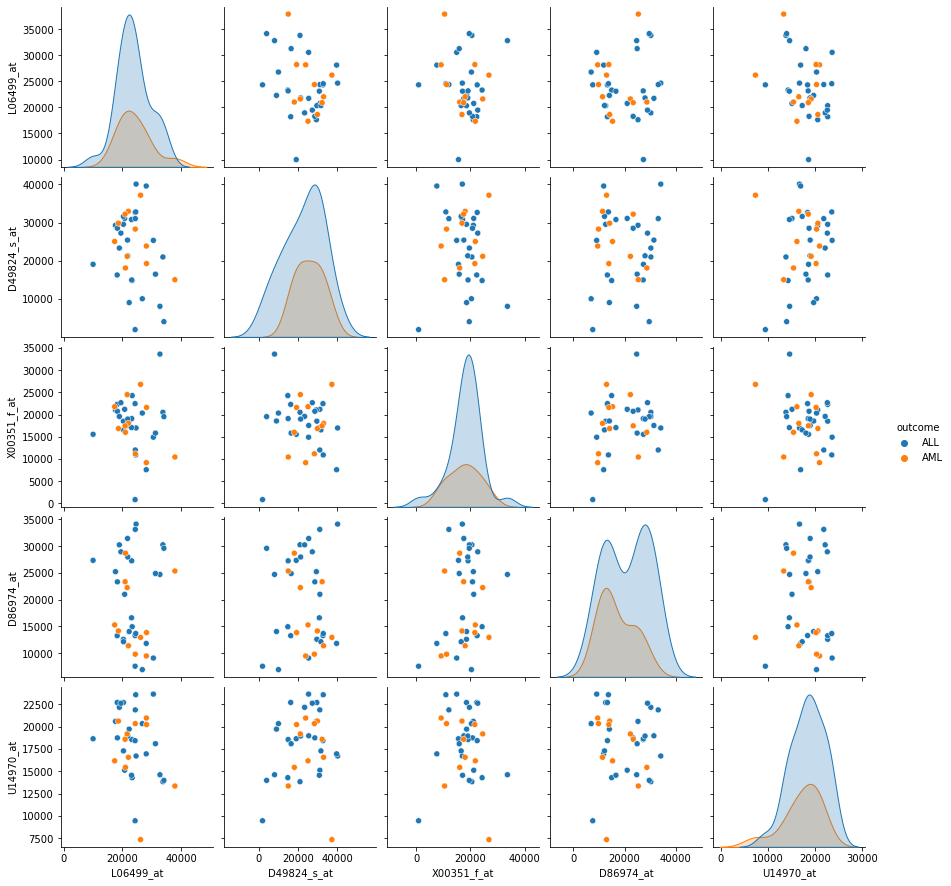

In [51]:
new=small_df.iloc[:,[0,1,2,3,4,9]]

sns.pairplot(new,hue='outcome')

In [ ]:
# will come back to this in a later section. I am not seeing great separation here as expected